In [41]:
import copy, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=2)

In [42]:
df= pd.read_csv('insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [43]:
df = pd.get_dummies(df, columns=['region'], prefix='region', drop_first=True)
df.head()

,age,sex,bmi,children,smoker,expenses,region_northwest,region_southeast,region_southwest
0,19,female,27.9,0,yes,16884.92,False,False,True
1,18,male,33.8,1,no,1725.55,False,True,False
2,28,male,33.0,3,no,4449.46,False,True,False
3,33,male,22.7,0,no,21984.47,True,False,False
4,32,male,28.9,0,no,3866.86,True,False,False


In [44]:
df.shape

(1338, 9)

In [45]:
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df.head()

,age,sex,bmi,children,smoker,expenses,region_northwest,region_southeast,region_southwest
0,19,0,27.9,0,1,16884.92,False,False,True
1,18,1,33.8,1,0,1725.55,False,True,False
2,28,1,33.0,3,0,4449.46,False,True,False
3,33,1,22.7,0,0,21984.47,True,False,False
4,32,1,28.9,0,0,3866.86,True,False,False


In [46]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [47]:
X= np.array(df.drop(columns= ['expenses']))
X = X.astype(float)
y= np.array(df['expenses'])

In [48]:
def rescale(x, avg, dev):
    avg= np.mean(x, axis=0)
    dev= np.std(x, axis=0)
    x_rescaled= (x- avg)/dev
    print(x[0])
    x_rescaled[0]
    return x_rescaled

In [49]:
X_train_raw = X[:1300]
X_test_raw = X[1300:]
train_avg = np.mean(X_train_raw, axis=0)
train_dev = np.std(X_train_raw, axis=0)
X_train = rescale(X_train_raw, train_avg, train_dev)
X_test = rescale(X_test_raw, train_avg, train_dev)
y_train= y[:1300]
y_test= y[1300:]

[45.   0.  25.2  2.   0.   0.   0.   0. ]
[24.   1.  31.1  0.   1.   0.   0.   0. ]


In [50]:
def cost(x,y,w,b):
    m= x.shape[0]
    cost=0.0
    for i in range(m):
        cost+= ((np.dot(x[i],w)+b)- y[i])**2
    cost /=(2*m)
    return cost
    

In [51]:
def gradient(x,y,w,b):
    m, n = x.shape
    predictions = np.dot(x, w) + b
    errors = predictions - y
    dw = np.dot(x.T, errors) / m
    db = np.sum(errors) / m
    return dw, db
    

In [52]:
def descent(x,y,w,b, alpha, iterations):
    cost_hist=[]
    w_tmp= w;
    b_tmp= b;

    for i in range(iterations):
        dw, db= gradient(x,y,w_tmp, b_tmp)
        w_tmp= w_tmp- alpha* dw
        b_tmp= b_tmp- alpha* db
        if i<1000:
            cost_hist.append(cost(x,y,w_tmp, b_tmp))
        if i%100==0:
            print(f"Iteration {i:4d}: Cost {cost_hist[-1]:8.2f}   ")
    return w_tmp, b_tmp, cost_hist
    

In [53]:
def predict(x, w, b):
    y= np.dot(w,x)+b
    return y

In [54]:
m=X_train[0].shape
w_init= np.zeros(m)
b_init=0
alpha= 0.01
iterations= 1000
w_final, b_final, cost_track= descent(X_train, y_train, w_init, b_init, alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost 158053483.32   
Iteration  100: Cost 37223785.23   
Iteration  200: Cost 20994422.84   
Iteration  300: Cost 18752247.76   
Iteration  400: Cost 18433746.25   
Iteration  500: Cost 18385892.13   
Iteration  600: Cost 18377559.12   
Iteration  700: Cost 18375563.41   
Iteration  800: Cost 18374849.85   
Iteration  900: Cost 18374518.70   
b,w found by gradient descent: 13256.35,[3615.93  -42.13 2018.15  584.67 9611.22 -139.4  -412.23 -371.12] 


In [55]:
def r2_score(y_true, y_pred):
    ss_res= np.sum((y_true- y_pred)**2)
    ss_mean= np.sum((y_true- np.mean(y_true))**2)
    r2= 1- (ss_res/ ss_mean)
    return r2

In [56]:
print(X_train[1])

[-0.23 -1.01 -0.11 -0.91 -0.51  1.76 -0.61 -0.57]


In [57]:
y_pred = np.dot(X_train, w_final) + b_final
y_pred

array([ 9086.16,  7060.46, 37110.67, ...,  6976.31, 11401.01,  5668.98],
      shape=(1300,))

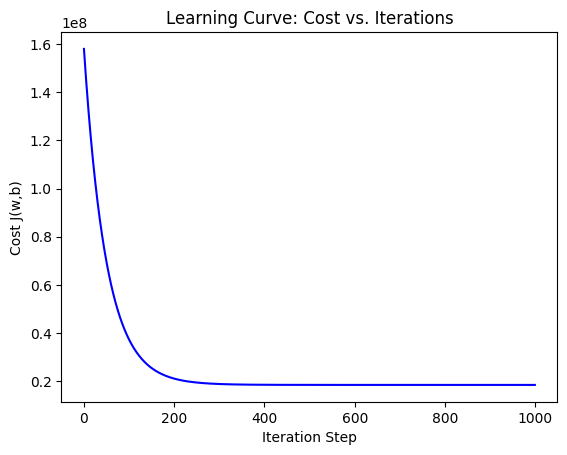

In [58]:
plt.plot(cost_track, color='blue')
plt.title("Learning Curve: Cost vs. Iterations") 
plt.xlabel("Iteration Step")                     
plt.ylabel("Cost J(w,b)")
plt.show()

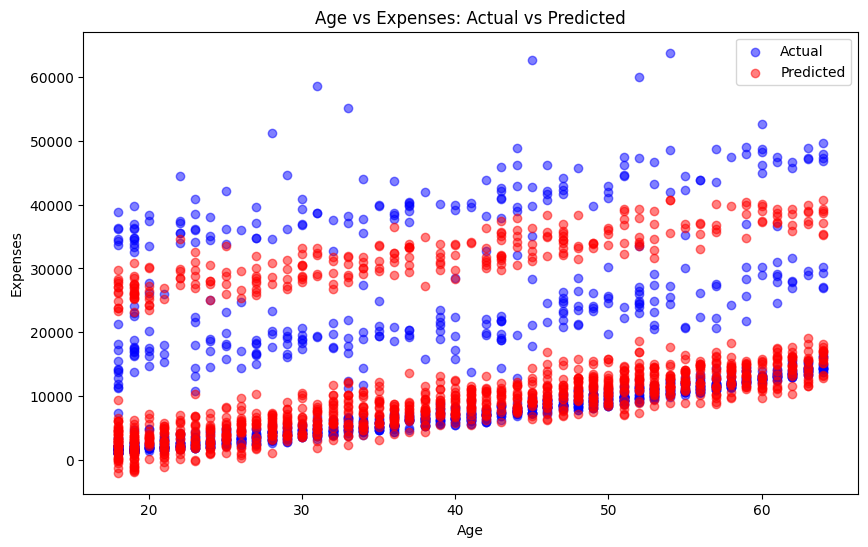

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:1300]['age'], y_train, color='blue', alpha=0.5, label='Actual')
plt.scatter(df.iloc[:1300]['age'], y_pred, color='red', alpha=0.5, label='Predicted')
plt.title("Age vs Expenses: Actual vs Predicted")
plt.xlabel("Age")
plt.ylabel("Expenses")
plt.legend()
plt.show()

In [60]:
y_test_pred= predict(X_test.T, w_final, b_final)
r2_test= r2_score(y_test, y_test_pred)
r2_test

np.float64(0.825563829852857)